In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def adjust_saturation_vibrance(img_bgr, saturation_scale=1.2, vibrance_scale=0.4):
    """
    Adjust saturation and vibrance globally on the entire image.

    Parameters:
    - img_bgr: input image in BGR uint8
    - saturation_scale: multiplier to increase saturation (>1 increases color intensity)
    - vibrance_scale: multiplier to boost vibrance (increase saturation more on less saturated pixels)

    """
    # Convert BGR to HSV color space for easier saturation adjustment
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
    H, S, V = cv2.split(img_hsv)

    # Increase saturation globally
    S = S * saturation_scale
    S = np.clip(S, 0, 255)

    # Vibrance adjustment: boost saturation more where initial saturation is low/medium
    vibrance_boost = vibrance_scale * (255 - S) * (S / 255)
    S = S + vibrance_boost
    S = np.clip(S, 0, 255)

    # Recombine channels and convert back to BGR
    img_hsv_adjusted = cv2.merge([H, S, V]).astype(np.uint8)
    adjusted_bgr = cv2.cvtColor(img_hsv_adjusted, cv2.COLOR_HSV2BGR)

    return adjusted_bgr

In [3]:
def display_images_side_by_side(img_list, titles):

    n = len(img_list)
    fig, axs = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:
        axs = [axs]
    for ax, img, title in zip(axs, img_list, titles):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
def save_image(img_bgr, out_path):
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    cv2.imwrite(out_path, img_bgr)
    print(f"Saved image at: {out_path}")

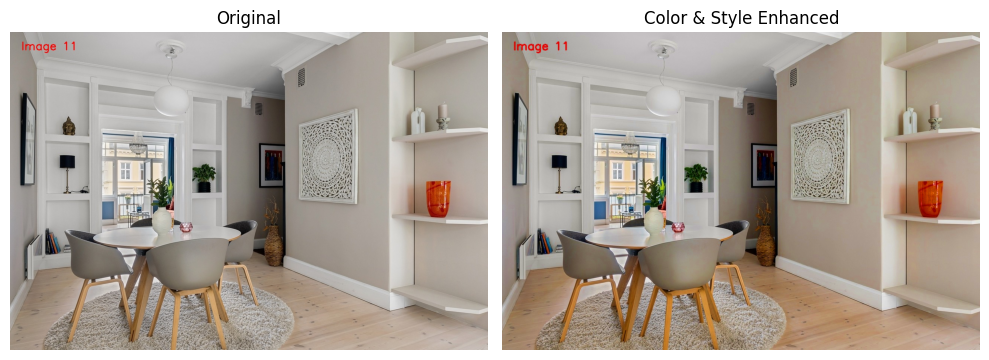

Saved image at: D:/AutoEnhnace/enhanced_colour_styled/color_styled_house_interior.jpg


In [6]:
if __name__ == "__main__":
    # Example usage
   
    input_path = r"IMAGE_FOLDER_PATH"  # Change to your image path
    output_path = r"OUTPUT_FOLDER_PATH_WITH_ENHANCED_IMAGE_LABEL.extension"

    img = cv2.imread(input_path)
    if img is None:
        print(f"Could not load image: {input_path}")
        exit(1)

    # Apply global saturation and vibrance adjustment
    color_styled_img = adjust_saturation_vibrance(img, saturation_scale=1.3, vibrance_scale=0.5)

   
    display_images_side_by_side([img, color_styled_img], ["Original", "Color & Style Enhanced"])

    save_image(color_styled_img, output_path)